# House Price Prediction Analysis
# DATA_606 Capstone in Data Science  - Chaojie Wang
## Final project proposal By Sathyam Chanumolu

## Problem statement:

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you may expect — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighborhood and based on gathered data you will try to assess your house price.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Reading dataset into dataframe

In [ ]:
df = pd.read_excel("innercity_house_price_details.xlsx")

# Displaying data in the dataframe

In [ ]:
df

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3.876101e+09,20150427T000000,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,...,1250.0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3.145600e+09,20150317T000000,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,...,0.0,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7.129303e+09,20140820T000000,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,...,0.0,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7.338220e+09,20141010T000000,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,...,0.0,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7.950301e+09,20150218T000000,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,...,0.0,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.036006e+08,20150310T000000,685530.0,4.0,2.50,3130.0,60467.0,2.0,0.0,0.0,...,0.0,1996.0,0.0,98014.0,47.6618,-121.962,2780.0,44224.0,1.0,63597.0
21609,6.250493e+08,20140521T000000,535000.0,2.0,1.00,1030.0,4841.0,1.0,0.0,0.0,...,110.0,1939.0,0.0,98103.0,47.6860,-122.341,1530.0,4944.0,0.0,5871.0
21610,4.240690e+08,20140905T000000,998000.0,3.0,3.75,3710.0,34412.0,2.0,0.0,0.0,...,800.0,1978.0,0.0,98075.0,47.5888,-122.04,2390.0,34412.0,1.0,38122.0
21611,7.258200e+09,20150206T000000,262000.0,4.0,2.50,1560.0,7800.0,2.0,0.0,0.0,...,0.0,1997.0,0.0,98168.0,47.5140,-122.316,1160.0,7800.0,0.0,9360.0


# Dataset rows and columns count

In [ ]:
shape = df.shape
print("{0} rows and {1} columns".format(shape[0], shape[1]))

21613 rows and 23 columns


# Data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  float64
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  float64
 16  zipcode           21613 non-null  float6

**Dataset has 21613 rows and 22 input columns, along with 1 output column which is price.**

# Dataframe describe

In [ ]:
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,2.161300e+04,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21556.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21447.000000,21584.000000,21584.000000
mean,4.580302e+09,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,0.234366,7.656857,1788.366556,291.522534,84.402258,98077.939805,47.560053,1987.065557,12766.543180,0.196720
std,2.876566e+09,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,0.766438,1.175484,828.102535,442.580840,401.679240,53.505026,0.138564,685.519629,27286.987107,0.397528
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,2360.000000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000


**From initial description of numerical features we can say that dataset has outliers present in it.**

# NULL values count in each column

In [ ]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

**Out of 23, 16 features has null values. The least null value present in the dataset is 1, whereas the maximum present as 166 which is less than 1% of the given dataset.**

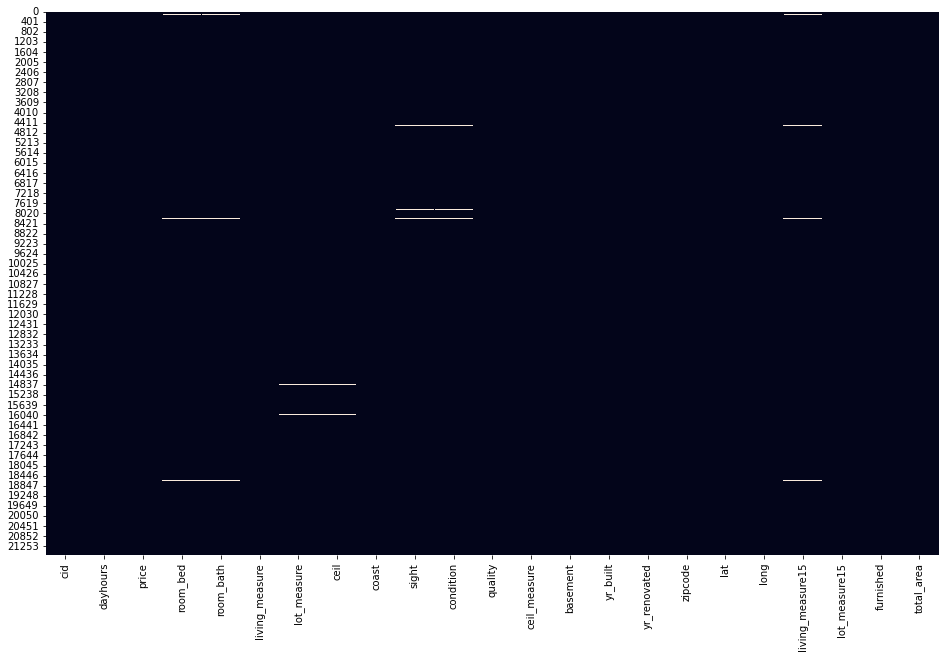

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(),cbar=False)

# Column data types

In [ ]:
df.dtypes

cid                 float64
dayhours             object
price               float64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated        float64
zipcode             float64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

# Duplicated rows count

In [ ]:
df.duplicated().sum()

0

In [ ]:
## As there are $ signs in some of the columns considering the $ sign as NULL value.
col_with_dollar_sign = [col for col in df.columns if df[df[col] == "$"][col].count() > 0]
for col in col_with_dollar_sign:
    df[col] = df[col].replace("$", np.nan)

# Data distribution with house year of built

In [ ]:
print("oldest and newest year present in the dataset is :")
print('oldest year : ',df["yr_built"].min(),', newest year : ',df["yr_built"].max())

oldest and newest year present in the dataset is :
oldest year :  1900.0 , newest year :  2015.0


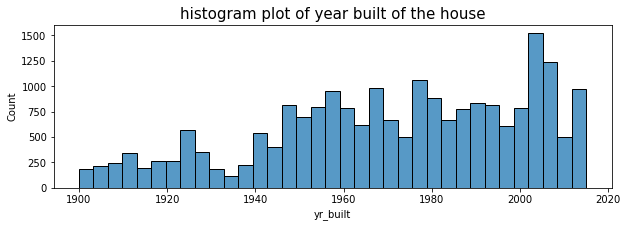

In [ ]:
plt.figure(figsize=(10,3))
sns.histplot(df['yr_built'])
plt.title("histogram plot of year built of the house", fontsize=15)
plt.show()

**With the latest year the count of house data is also increasing in the dataset.**

# Houses with different number of beds.

In [ ]:
print(df["room_bed"].unique())

[ 4.  2.  3.  1.  5.  6. nan  7. 10.  8.  0.  9. 33. 11.]


# Houses with different number of baths.

In [ ]:
print(df["room_bath"].unique())

[1.75 1.   2.75 2.5  1.5  3.5  2.   2.25 3.   4.   3.25 3.75  nan 5.
 0.75 5.5  4.25 4.5  4.75 8.   6.75 5.25 6.   0.   1.25 5.75 7.5  6.5
 0.5  7.75 6.25]


# Houses either furnished or not

In [ ]:
print(df["furnished"].unique())

[ 0.  1. nan]


## Checking the correlation of the dataset

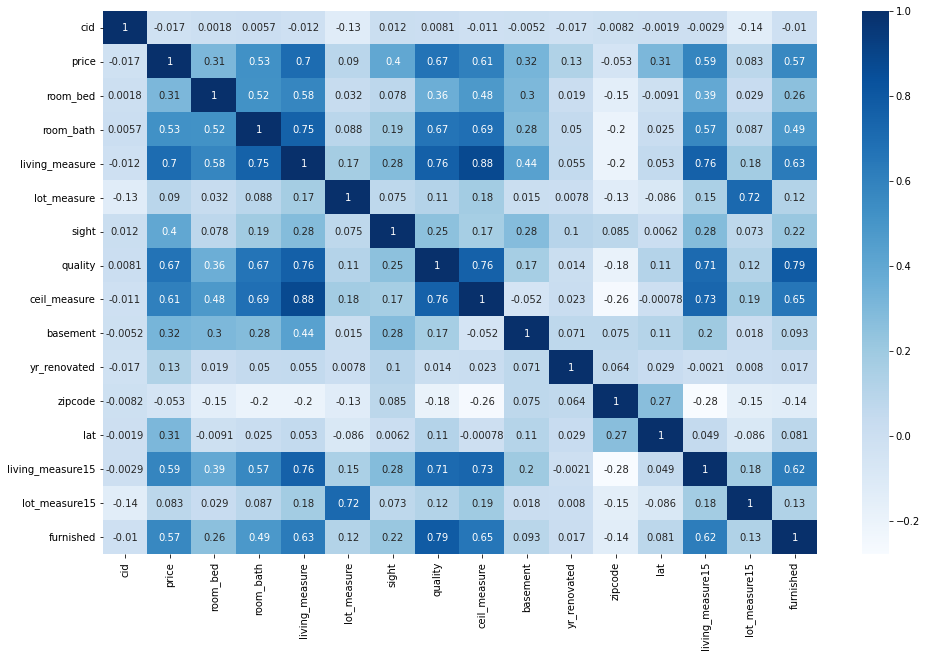

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

**My target column is price. From this heatmap the potential features for machine learning are living_measure, quality, ceil_measure, living_measure15, furnished etc.,**

In [ ]:
## perfroming central limit theorem to check whether the column sample means follow normality or not
def CLT(data, total_samples, rows_in_each_sample):
    """
    This function generates samples from the given column and perfroms CLT.
    """
    ## converting to array 
    data = np.array(data)
    ## getting rows for each sample
    index_list = [random.sample(range(0, len(data)), rows_in_each_sample) for i in range(total_samples)]
    ## generating sample means
    sample_means = [data[idxes].mean() for idxes in index_list]
    return sample_means

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

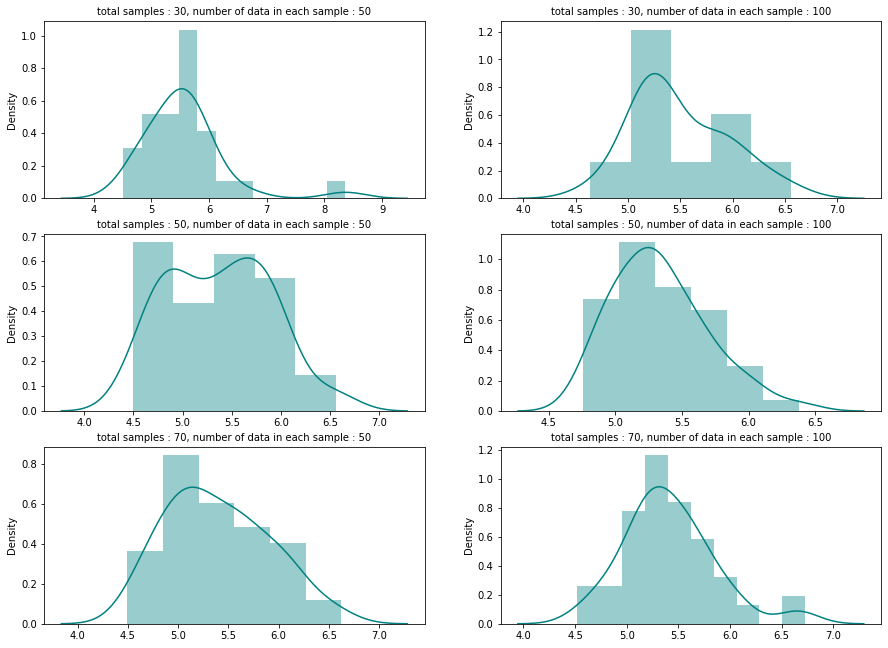

In [ ]:
total_samples = [30, 30, 50, 50, 70, 70]
rows_in_each_sample = [50, 100, 50, 100, 50, 100]
fig = plt.figure(figsize=(15,15))
for idx, (sample, row_sample) in enumerate(zip(total_samples, rows_in_each_sample)):
    plt.subplot(4, 2, idx+1)
    sns.distplot(CLT(df["price"]/100000, sample, row_sample), color = "teal")
    plt.title(f"total samples : {sample}, number of data in each sample : {row_sample}", fontsize=10)
plt.show()

**From above distribution plots of mean values of samples we can say that CLT doesn't hold true.**

From this initial pre-processing, I understand how the data is distributed. In addition to that, identified the data shape and size also the info of the dataset.